Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [6]:
## If you are using the data by mounting the google drive, use the following :
#from google.colab import drive
#drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [8]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:/Users/sunil/OneDrive/Desktop/UPGRAD/CONVOLUTION NEURAL NETWORK/Dataset/Train")
data_dir_test = pathlib.Path('C:/Users/sunil/OneDrive/Desktop/UPGRAD/CONVOLUTION NEURAL NETWORK/Dataset/Test')

In [9]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [12]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [14]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=True
)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [15]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=True
)


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [16]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

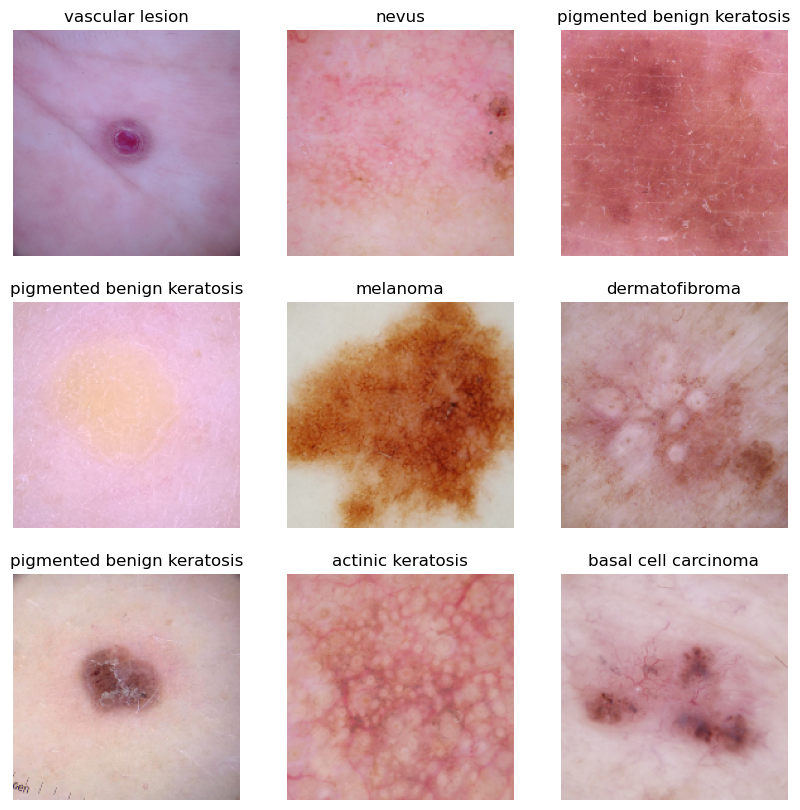

In [18]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [21]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [23]:
### Your code goes here
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255 ,  input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(9)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [25]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

### Train the model

In [41]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 43s 572ms/step - loss: 2.0073 - accuracy: 0.2400 - val_loss: 1.8016 - val_accuracy: 0.4161
Epoch 2/20
56/56 [==============================] - 29s 510ms/step - loss: 1.6824 - accuracy: 0.3906 - val_loss: 1.5109 - val_accuracy: 0.5190
Epoch 3/20
56/56 [==============================] - 28s 500ms/step - loss: 1.5283 - accuracy: 0.4615 - val_loss: 1.4938 - val_accuracy: 0.4810
Epoch 4/20
56/56 [==============================] - 28s 505ms/step - loss: 1.4267 - accuracy: 0.5156 - val_loss: 1.4036 - val_accuracy: 0.5011
Epoch 5/20
56/56 [==============================] - 28s 493ms/step - loss: 1.3981 - accuracy: 0.5100 - val_loss: 1.4505 - val_accuracy: 0.4966
Epoch 6/20
56/56 [==============================] - 28s 506ms/step - loss: 1.3453 - accuracy: 0.5273 - val_loss: 1.4473 - val_accuracy: 0.4877
Epoch 7/20
56/56 [==============================] - 28s 498ms/step - loss: 1.3691 - accuracy: 0.5201 - val_loss: 1.4318 - val_accuracy: 0.5034

### Visualizing training results

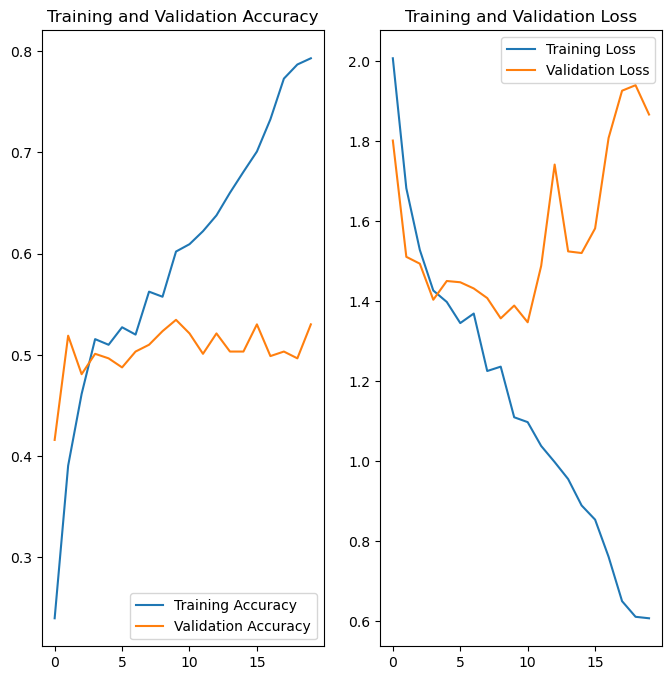

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
The model's training accuracy shows a steady from 24% to 79.30%, while validation accuracy remains consistently around 50%.<b>

A high training accuracy suggests the model has effectively captured the noise within the data. However, its poor performance on validation data indicates a lack of generalizability.<b>

These observations confirm the presence of overfitting.<b>

In [46]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
# Define the augmentation function
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)



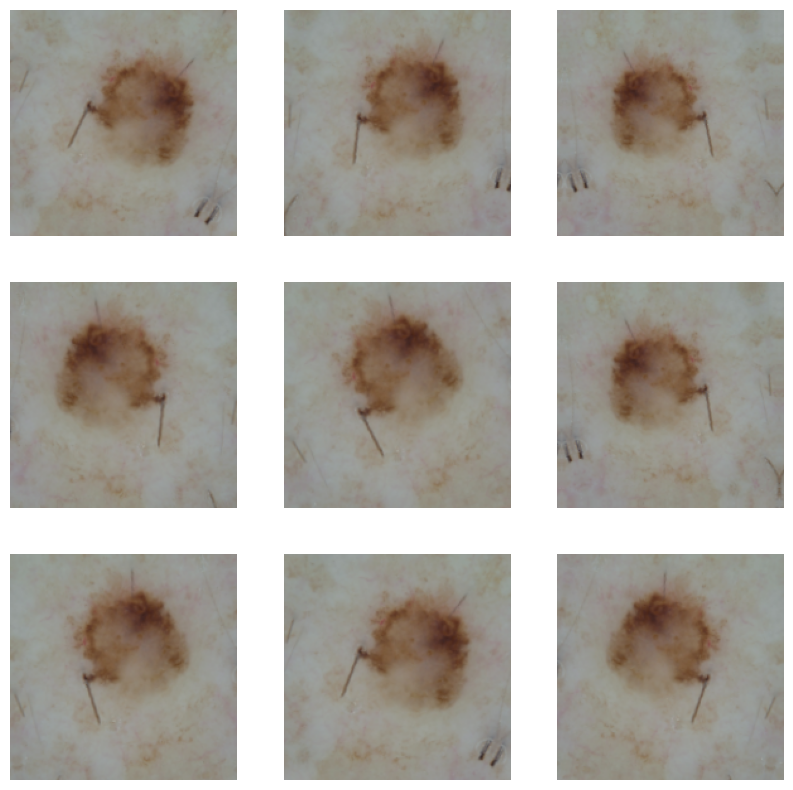

In [48]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [50]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
### Your code goes here
model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255 ,  input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(9)
])



### Compiling the model

In [52]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [56]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 45s 793ms/step - loss: 0.9971 - accuracy: 0.6479 - val_loss: 1.4204 - val_accuracy: 0.5257
Epoch 2/20
56/56 [==============================] - 40s 707ms/step - loss: 0.9634 - accuracy: 0.6490 - val_loss: 1.4289 - val_accuracy: 0.5280
Epoch 3/20
56/56 [==============================] - 42s 745ms/step - loss: 0.9505 - accuracy: 0.6479 - val_loss: 1.4879 - val_accuracy: 0.5280
Epoch 4/20
56/56 [==============================] - 42s 739ms/step - loss: 0.9380 - accuracy: 0.6540 - val_loss: 1.6160 - val_accuracy: 0.4922
Epoch 5/20
56/56 [==============================] - 40s 707ms/step - loss: 0.8981 - accuracy: 0.6758 - val_loss: 1.5100 - val_accuracy: 0.5190
Epoch 6/20
56/56 [==============================] - 40s 709ms/step - loss: 0.8784 - accuracy: 0.6780 - val_loss: 1.4688 - val_accuracy: 0.5145
Epoch 7/20
56/56 [==============================] - 40s 713ms/step - loss: 0.8361 - accuracy: 0.6942 - val_loss: 1.5032 - val_accuracy: 0.4989

### Visualizing the results

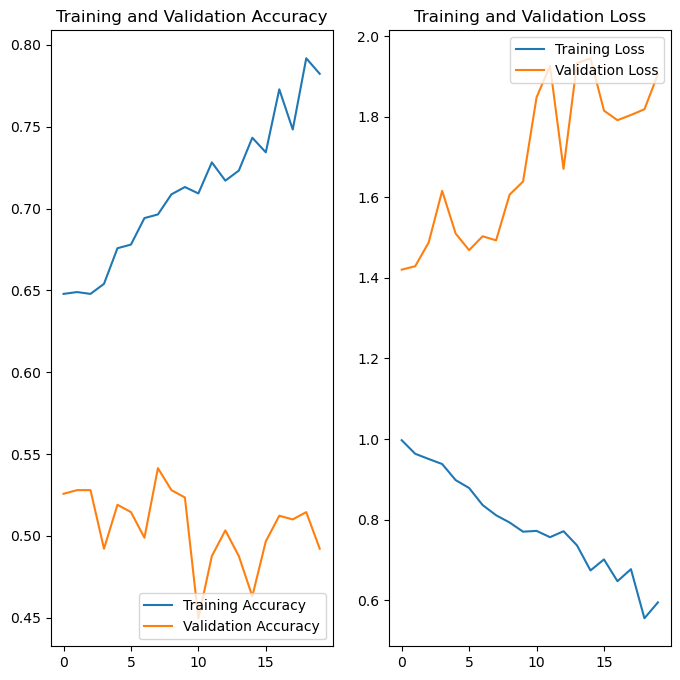

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?<b>
1->By leveraging augmented data, overfitting has been effectively addressed.<b>

2->The training and validation accuracy of the model fall within a similar range.<b>

3->Both the training and validation data are showing poor performance, indicating that the model is now exhibiting underfitting.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

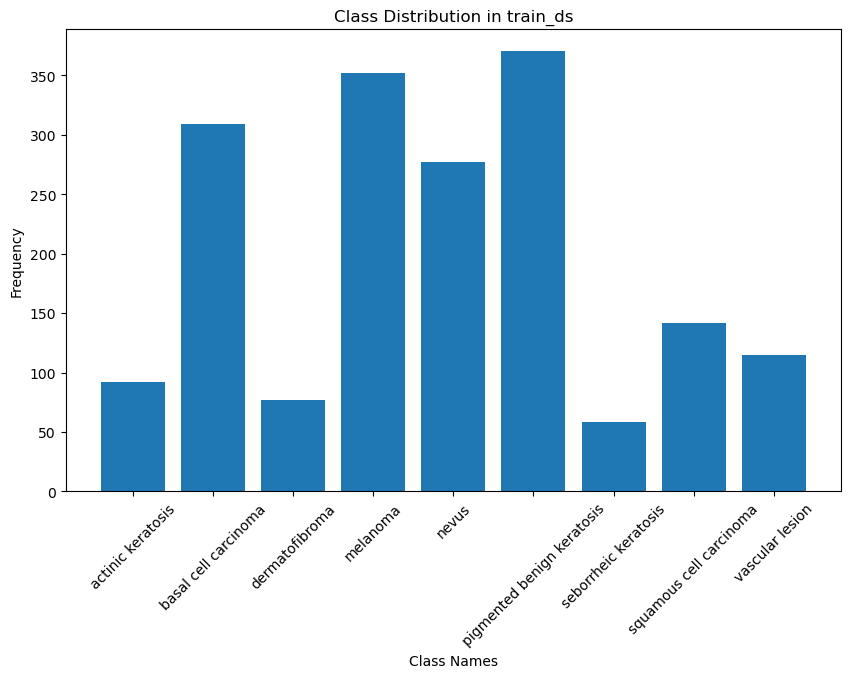

In [60]:
## Your code goes here.
from collections import Counter

# Assuming 'train_ds' is your dataset and 'class_names' is the list of class labels.
class_counts = Counter()

# Iterate over the dataset to count the occurrences of each class label
for images, labels in train_ds:
    for label in labels:
        class_counts[label.numpy()] += 1  # Assuming labels are in tensor form

# Convert the counts into a list to plot the distribution
counts = [class_counts[i] for i in range(len(class_names))]

# Plot the class distribution
plt.figure(figsize=(10,6))
plt.bar(class_names, counts)
plt.xlabel('Class Names')
plt.ylabel('Frequency')
plt.title('Class Distribution in train_ds')
plt.xticks(rotation=45)
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
The class "seborrheic keratosis" comprises the smallest proportion of samples.
#### - Which classes dominate the data in terms proportionate number of samples?
"Pigmented benign keratosis" and "melanoma" significantly outweigh other classes


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [74]:
pip install augmentor

Note: you may need to restart the kernel to use updated packages.


In [76]:
conda install -c conda-forge augmentor

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sunil\anaconda3

  added / updated specs:
    - augmentor


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    augmentor-0.2.12           |     pyhd8ed1ab_0          37 KB  conda-forge
    ca-certificates-2025.1.31  |       h56e8100_0         155 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         349 KB

The following NEW packages will be INSTALLED:

  augmentor          conda-forge/noarch::augmentor-0.2.12-pyhd8ed1ab_0 

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2024.12.31~ --> conda-forge::ca-certificates-2025.1.31-h56e8100_0 

The following packages will be SUPERSEDED by a higher-priori



==> WARNING: A newer version of conda exists. <==
  current version: 23.9.0
  latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.1.1




To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [63]:
path_to_training_dataset="C:/Users/sunil/OneDrive/Desktop/UPGRAD/CONVOLUTION NEURAL NETWORK/Dataset/Train/"
import Augmentor
for i in class_names:
    #print(path_to_training_dataset+i)
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:/Users/sunil/OneDrive/Desktop/UPGRAD/CONVOLUTION NEURAL NETWORK/Dataset/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A5CE9E9D60>: 100%|██████████| 500/500 [00:07<00:00, 65.49 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to C:/Users/sunil/OneDrive/Desktop/UPGRAD/CONVOLUTION NEURAL NETWORK/Dataset/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A5CEBDF790>: 100%|██████████| 500/500 [00:07<00:00, 68.73 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to C:/Users/sunil/OneDrive/Desktop/UPGRAD/CONVOLUTION NEURAL NETWORK/Dataset/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A5CF331250>: 100%|██████████| 500/500 [00:06<00:00, 76.56 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:/Users/sunil/OneDrive/Desktop/UPGRAD/CONVOLUTION NEURAL NETWORK/Dataset/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2A5CF5F2D30>: 100%|██████████| 500/500 [00:31<00:00, 15.63 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to C:/Users/sunil/OneDrive/Desktop/UPGRAD/CONVOLUTION NEURAL NETWORK/Dataset/Train/nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1504x1129 at 0x2A5D0191A90>: 100%|██████████| 500/500 [00:24<00:00, 20.06 Samples/s]


Initialised with 462 image(s) found.
Output directory set to C:/Users/sunil/OneDrive/Desktop/UPGRAD/CONVOLUTION NEURAL NETWORK/Dataset/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A5CF4F0370>: 100%|██████████| 500/500 [00:06<00:00, 76.02 Samples/s]                   


Initialised with 77 image(s) found.
Output directory set to C:/Users/sunil/OneDrive/Desktop/UPGRAD/CONVOLUTION NEURAL NETWORK/Dataset/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2A5CEA6A910>: 100%|██████████| 500/500 [00:13<00:00, 38.40 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:/Users/sunil/OneDrive/Desktop/UPGRAD/CONVOLUTION NEURAL NETWORK/Dataset/Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2A5CF60DDF0>: 100%|██████████| 500/500 [00:06<00:00, 81.83 Samples/s] 


Initialised with 139 image(s) found.
Output directory set to C:/Users/sunil/OneDrive/Desktop/UPGRAD/CONVOLUTION NEURAL NETWORK/Dataset/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A5CEA8E910>: 100%|██████████| 500/500 [00:06<00:00, 80.94 Samples/s]                   


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [65]:
data_dir_train = pathlib.Path("C:/Users/sunil/OneDrive/Desktop/UPGRAD/CONVOLUTION NEURAL NETWORK/Dataset/Train")
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [67]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\sunil\\OneDrive\\Desktop\\UPGRAD\\CONVOLUTION NEURAL NETWORK\\Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_039dc163-8b0a-485b-a8bb-ca602d7da7ff.jpg',
 'C:\\Users\\sunil\\OneDrive\\Desktop\\UPGRAD\\CONVOLUTION NEURAL NETWORK\\Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_f81e4332-f813-4a23-9371-de76d6758b13.jpg',
 'C:\\Users\\sunil\\OneDrive\\Desktop\\UPGRAD\\CONVOLUTION NEURAL NETWORK\\Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_481b00dc-43fe-46c5-8aa0-46b497cdf3b6.jpg',
 'C:\\Users\\sunil\\OneDrive\\Desktop\\UPGRAD\\CONVOLUTION NEURAL NETWORK\\Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_5eb2d04a-2658-4661-a1db-e889f0d4f3c4.jpg',
 'C:\\Users\\sunil\\OneDrive\\Desktop\\UPGRAD\\CONVOLUTION NEURAL NETWORK\\Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_7d383c55-f818-4a47

In [69]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [71]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [114]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

dataframe_dict_new = dict(zip(path_list, lesion_list_new))
new_df = original_df.append(df2)

NameError: name 'original_df' is not defined

In [ ]:
new_df['Label'].value_counts()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [73]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [75]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [77]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [79]:
## your code goes here
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(9)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [81]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [83]:
epochs = 20
## Your code goes here, use 50 epochs.
history = history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 132s 662ms/step - loss: 2.0146 - accuracy: 0.3984 - val_loss: 8.8034 - val_accuracy: 0.1062
Epoch 2/20
169/169 [==============================] - 121s 714ms/step - loss: 1.3838 - accuracy: 0.4948 - val_loss: 6.6591 - val_accuracy: 0.1967
Epoch 3/20
169/169 [==============================] - 127s 749ms/step - loss: 1.2140 - accuracy: 0.5384 - val_loss: 2.3553 - val_accuracy: 0.3660
Epoch 4/20
169/169 [==============================] - 129s 757ms/step - loss: 1.1084 - accuracy: 0.5866 - val_loss: 1.6134 - val_accuracy: 0.4120
Epoch 5/20
169/169 [==============================] - 130s 762ms/step - loss: 0.9905 - accuracy: 0.6198 - val_loss: 1.5963 - val_accuracy: 0.4610
Epoch 6/20
169/169 [==============================] - 125s 735ms/step - loss: 0.9108 - accuracy: 0.6513 - val_loss: 1.1114 - val_accuracy: 0.5672
Epoch 7/20
169/169 [==============================] - 136s 799ms/step - loss: 0.8259 - accuracy: 0.6849 - val_loss: 3.2405 -

#### **Todo:**  Visualize the model results

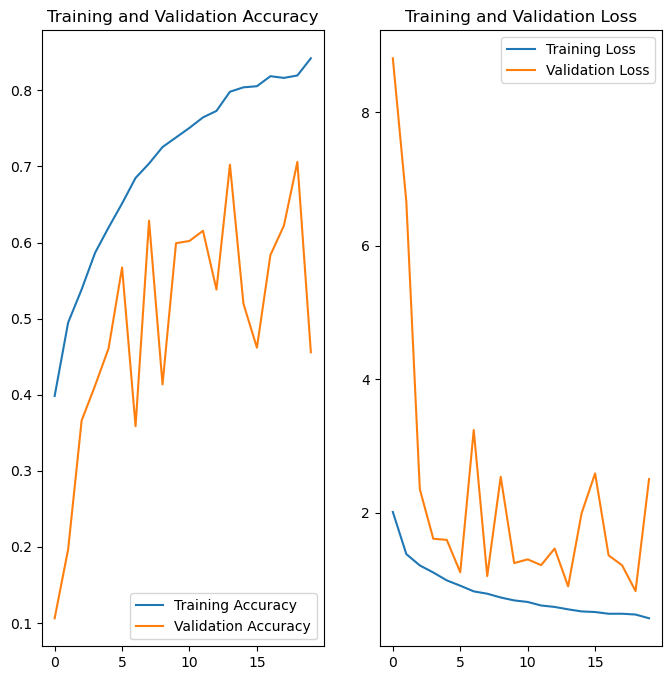

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



The ultimate model showcases well-balanced performance, displaying no signs of underfitting or overfitting.<b>

The implementation of class rebalancing has notably enhanced the model's performance across both training and validation datasets.<b>

The narrow divergence between training and validation accuracies underscores the robust generalization capability of the final CNN model.<b>

The addition of batch normalization failed to enhance both training and validation accuracy.<b>